In [1]:
%matplotlib inline
import numpy as np
from PIL import Image

# from keras.layers import merge, Input, Conv2D, MaxPooling2D, UpSampling2D, Cropping2D, Flatten, Dense, BatchNormalization, Dropout
# from keras.models import Model
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Layer, Dense, Dropout, Activation, Flatten, Reshape, Merge, Permute
from keras.layers import ZeroPadding2D, UpSampling2D
from keras.layers.normalization import BatchNormalization

from keras.layers.merge import concatenate
from keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [3]:
def get_crop_shape(target, refer):
        # width, the 3rd dimension
        cw = (target.get_shape()[2] - refer.get_shape()[2]).value
        assert (cw >= 0)
        if cw % 2 != 0:
            cw1, cw2 = int(cw/2), int(cw/2) + 1
        else:
            cw1, cw2 = int(cw/2), int(cw/2)
        # height, the 2nd dimension
        ch = (target.get_shape()[1] - refer.get_shape()[1]).value
        assert (ch >= 0)
        if ch % 2 != 0:
            ch1, ch2 = int(ch/2), int(ch/2) + 1
        else:
            ch1, ch2 = int(ch/2), int(ch/2)

        return (ch1, ch2), (cw1, cw2)

In [4]:
def get_unet(ncha, img_rows, img_cols):

#     inputs = Input((img_rows, img_cols, ncha))
    label_rows = img_rows
    label_cols = img_cols
    ####################3
    kernel = 3
    filter_size = 64
    pad = 1
    pool_size = 2

    model = Sequential()

    model.add(Layer(input_shape=(img_rows, img_cols, 3)))
    # encoding layers
    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(filter_size, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(128, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(256, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(512, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # decoding layers
    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(512, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())

    model.add(UpSampling2D(size=(pool_size, pool_size)))
    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(256, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())

    model.add(UpSampling2D(size=(pool_size, pool_size)))
    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(128, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())

    model.add(UpSampling2D(size=(pool_size, pool_size)))
    model.add(ZeroPadding2D(padding=(pad, pad)))
    model.add(Convolution2D(filter_size, kernel, kernel, border_mode='valid'))
    model.add(BatchNormalization())

    model.add(Convolution2D(1, 1, 1, border_mode='valid',))
    print model.output_shape
    model.add(Reshape((label_rows * label_cols,)))
    model.add(Activation('sigmoid'))

    model.add(Reshape((label_rows, label_cols, 1)))
    model.compile(loss="binary_crossentropy", optimizer='rmsprop',
                  metrics=['binary_accuracy'])
    ####################

#     model = Model(inputs = [inputs], outputs = [conv10])

#     model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

In [5]:
img_size = 512

In [6]:
model = get_unet(3, img_size, img_size)
# adam = Adam()
# model.compile(adam, loss=['binary_crossentropy'], metrics=['accuracy'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="valid")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="valid")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="valid")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="valid")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="valid")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="valid")`


(None, 512, 512, 1)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="valid")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:55: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="valid")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (1, 1), padding="valid")`


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Layer)              (None, 512, 512, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 514, 514, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 512, 512, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 258, 258, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 128)     73856     
__________

In [8]:
# imgs_train = [np.expand_dims(np.array(Image.open('/root/data/hackathon/building_massa_dataset/images/train/22678915_15.tiff')), axis=0)]
# imgs_mask_train = [np.expand_dims(np.array(Image.open('/root/data/hackathon/building_massa_dataset/labels/train/22678915_15.tif'))[6:-6, 6:-6], axis=0)]

In [9]:
batch_size = 4

In [10]:
train_steps = 1000//batch_size
val_steps = 100//batch_size

In [11]:
def myGenerator(file_paths, steps_per_epoch, BATCH_SIZE, INPUT_SHAPE):
    i = 0
    while True:
        x_batch = np.empty((BATCH_SIZE, INPUT_SHAPE[0], INPUT_SHAPE[1], INPUT_SHAPE[2]))
        y_batch = np.empty((BATCH_SIZE, INPUT_SHAPE[0], INPUT_SHAPE[1], 1))
        for (ind, j) in enumerate(range(i*BATCH_SIZE, (i+1)*BATCH_SIZE)):
            # x_batch[ind,...] = np.array(Image.open(np.random.choice(id2image[rand_class])).convert('RGB').resize((INPUT_SHAPE[0], INPUT_SHAPE[1])))
            # y_batch[ind,...] = get_1_hot(classes.index(rand_class), classes)
            # pick a random image
            f = np.random.choice(file_paths)
            random_x = np.random.randint(0, 1500-img_size)
            random_y = np.random.randint(0, 1500-img_size)
#             random_x = 900
#             random_y = 900
            x_batch[ind,...] = np.array(Image.open(f))[random_x:random_x+img_size, random_y:random_y+img_size, :]
            # pick the corresponding mask
            ftruth = f.replace('images', 'labels')
            ftruth = ftruth[:-1]
            mask = np.expand_dims(np.array(Image.open(ftruth))[random_x:random_x+img_size, random_y:random_y+img_size, 0], axis=2)
            # mask = np.array(Image.open(ftruth))[random_x:random_x+img_size, random_y:random_y+img_size, :]
            mask[mask==255]=1
            y_batch[ind,...] = mask
        # x_batch = seq.augment_images(x_batch)
        i += 1
        if i >= steps_per_epoch:
            i = 0
        yield x_batch, y_batch

In [12]:
train = [os.path.join('/root/data/hackathon/building_massa_dataset/images/train/', f ) for f in os.listdir('/root/data/hackathon/building_massa_dataset/images/train/') if f.endswith('.tiff')]
val = [os.path.join('/root/data/hackathon/building_massa_dataset/images/valid/', f ) for f in os.listdir('/root/data/hackathon/building_massa_dataset/images/valid/') if f.endswith('.tiff')]
print len(train)
print len(val)
# train = [train[12]]
# val = [val[3]]
# print train
# print val
# tfile_list = [f for f in os.listdir('/root/data/hackathon/building_massa_dataset/images/train/') if f.endswith('.tiff')]
# valfile_list = [f for f in os.listdir('/root/data/hackathon/building_massa_dataset/images/valid/') if f.endswith('.tiff')]
# # just pick the first image
# train = [os.path.join('/root/data/hackathon/building_massa_dataset/images/train/', f ) for f in tfile_list[0]]
# val = [os.path.join('/root/data/hackathon/building_massa_dataset/images/valid/', f ) for f in valfile_list[0]]

137
4


In [13]:
train_generator = myGenerator(train, train_steps, batch_size, (img_size, img_size, 3))
validation_generator = myGenerator(val, val_steps, batch_size, (img_size, img_size, 3))

(4, 512, 512, 3)
(4, 512, 512, 1)


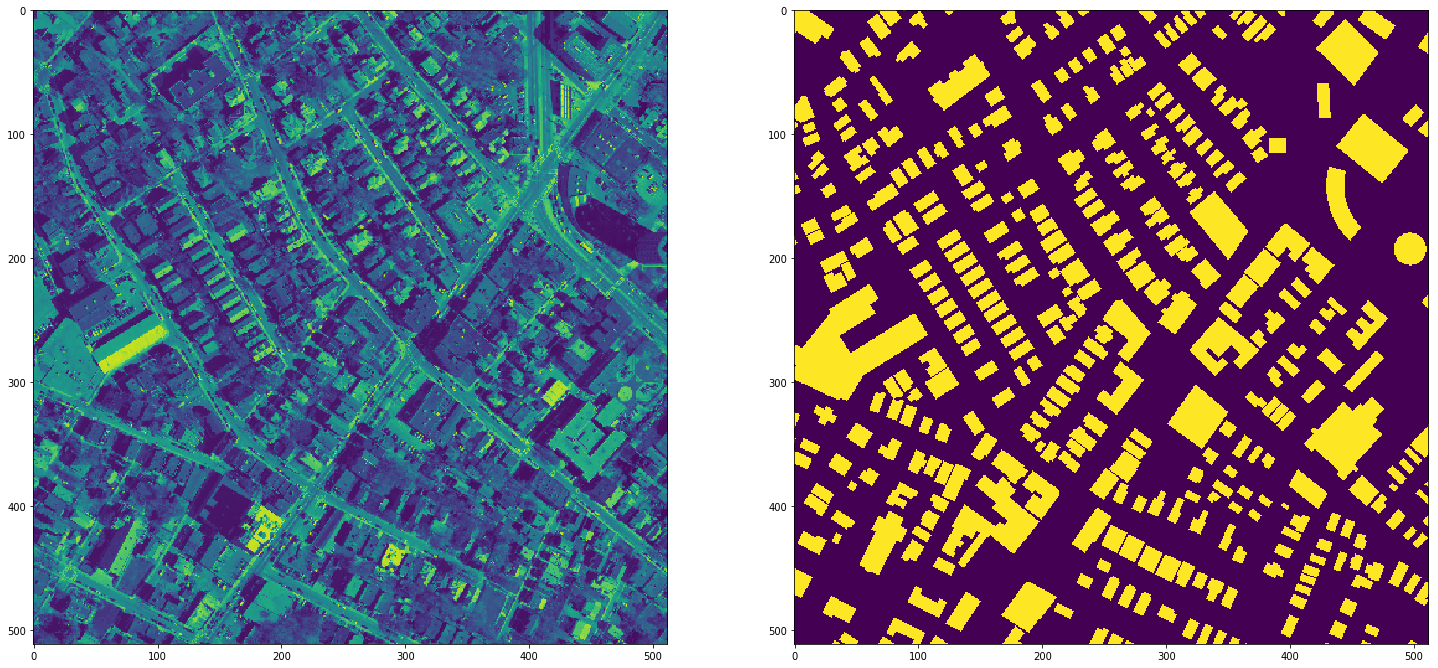

In [14]:
# plot train data
tt = train_generator.next()
buildings, label = tt[0], tt[1]
print buildings.shape
print label.shape
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,25))
ax1.imshow(buildings[0, :, :, 1])
ax2.imshow(label[0, :, :, 0])

In [15]:
reduce_lr = ReduceLROnPlateau(monitor='val_jaccard_coef_int',
                             factor=0.5,
                             patience=1,
                             min_lr=1e-6)
checkpoint = ModelCheckpoint('/root/data/hackathon/amir_weights_{epoch:02d}.hdf5')
callbacks_list = [reduce_lr, checkpoint]

In [16]:
# start training
# history = model.fit_generator(
#         generator=train_generator,
#         steps_per_epoch=train_steps,
#         epochs=1,
#         verbose=1,
#         validation_data=validation_generator,
#         validation_steps=val_steps)

# start training
history = model.fit_generator(
        generator=train_generator,
        steps_per_epoch=500,
        epochs=1,
        verbose=1,
        validation_data=validation_generator,
        validation_steps=val_steps,
        callbacks=callbacks_list)

Epoch 1/1


ResourceExhaustedError: OOM when allocating tensor with shape[4,514,514,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: zero_padding2d_8/Pad = Pad[T=DT_FLOAT, Tpaddings=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](up_sampling2d_3/ResizeNearestNeighbor, zero_padding2d_1/Pad/paddings)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: metrics/binary_accuracy/Mean_1/_313 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_3155_metrics/binary_accuracy/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op u'zero_padding2d_8/Pad', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 832, in start
    self._run_callback(self._callbacks.popleft())
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-047bc098e4e9>", line 1, in <module>
    model = get_unet(3, img_size, img_size)
  File "<ipython-input-4-afbf53531adf>", line 54, in get_unet
    model.add(ZeroPadding2D(padding=(pad, pad)))
  File "/usr/local/lib/python2.7/dist-packages/keras/models.py", line 492, in add
    output_tensor = layer(self.outputs[0])
  File "/usr/local/lib/python2.7/dist-packages/keras/engine/topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/keras/layers/convolutional.py", line 2032, in call
    data_format=self.data_format)
  File "/usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py", line 2200, in spatial_2d_padding
    return tf.pad(x, pattern)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/array_ops.py", line 1893, in pad
    result = gen_array_ops._pad(tensor, paddings, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 2893, in _pad
    "Pad", input=input, paddings=paddings, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[4,514,514,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: zero_padding2d_8/Pad = Pad[T=DT_FLOAT, Tpaddings=DT_INT32, _device="/job:localhost/replica:0/task:0/device:GPU:0"](up_sampling2d_3/ResizeNearestNeighbor, zero_padding2d_1/Pad/paddings)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: metrics/binary_accuracy/Mean_1/_313 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_3155_metrics/binary_accuracy/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [ ]:
# test = model.predict(np.expand_dims(np.array(Image.open('/root/data/hackathon/building_massa_dataset/images/train/22678915_15.tiff'))[:img_size, :img_size, :], axis=0))
## model prediction on training data
test_inp = buildings
test_out = model.predict(test_inp)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))
ax1.imshow(buildings[0, :, :, 0])
ax2.imshow(test_out[0, :, : , 0], cmap='jet')

In [ ]:
## prediction example on validation data
tt = validation_generator.next()
buildings_val, label_val = tt[0], tt[1]
print buildings_val.shape
print label_val.shape
test_inp = buildings_val
test_out = model.predict(test_inp)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25,25))
# ax1.imshow(buildings_val[0, :, :, 1])
ax1.imshow(buildings_val[0, :, :, 1])
ax2.imshow(test_out[0, :, :, 0])